In [3]:
import numpy as np
import pandas as pd
import scipy

In [4]:
DATA_DIR = "./rawdata/geneticdata/DBPLIC1_wSCORECLass.txt"
genetic_data = pd.read_csv(DATA_DIR,delimiter='\t')
updated_genetic_data = genetic_data.drop(labels=['cod_pz','Unnamed: 0','Score','ScoreClass'],axis=1)
updated_genetic_data.apply(pd.to_numeric)
updated_genetic_data.describe()

,BPIFB4 rs2070325,ST6GAL1_rs11710456,SLC2A2_rs5400,CD36_rs1761667,CD36_rs1049673,ZC3H10_rs61732294,HDAC1_rs1741981,HDAC1_rs1741981_CCeCTvsTT,HDAC1_rs1741981_CCvsCTeTT,HDAC3_rs2547547,...,rs_9420907,rs_9420907_1vs2e3,rs_9420907_1e2vs3,rs_8105767,rs_8105767_1vs2e3,rs_8105767_1e2vs3,rs_755017,rs_755017_1vs2e3,rs_755017_1e2vs3,SCORE
count,2027.000000,2090.000000,2272.000000,2215.000000,2213.000000,2287.000000,2269.000000,2269.000000,2269.000000,2269.000000,...,1860.000000,1860.000000,1860.000000,1842.000000,1842.000000,1842.000000,1762.000000,1762.000000,1762.000000,1445.000000
mean,1.670449,1.559330,1.346831,2.004515,2.061003,1.547442,1.248568,1.019833,1.228735,1.330101,...,1.343011,1.310215,1.032796,1.534745,1.456026,1.078719,1.131669,1.128263,1.003405,2.851420
std,0.704610,0.633039,0.598949,0.705494,0.698993,0.503097,0.475969,0.139455,0.420111,0.568017,...,0.539539,0.462706,0.178149,0.637535,0.498198,0.269372,0.348154,0.334478,0.058271,3.643885
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.518080
50%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.598360
75%,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.816545
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,30.489526


In [5]:
cleaned_data = updated_genetic_data.dropna(subset=['SCORE']) 

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=cleaned_data.iloc[:,:104]  # Features
y=cleaned_data['SCORE']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [7]:
X_train += 1
X_test +=1
X_trainnew = X_train.fillna(0)
X_testnew = X_test.fillna(0)
X_trained = scipy.sparse.csr_matrix(X_trainnew.values)
X_tested = scipy.sparse.csr_matrix(X_testnew.values)

X_trained

<1011x104 sparse matrix of type '<class 'numpy.float64'>'
	with 79018 stored elements in Compressed Sparse Row format>

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trained,y_train.values)

y_pred=clf.predict(X_tested)

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Mean Squared Error: ",metrics.mean_absolute_error(y_test, y_pred))
#print("Accuracy:",metrics.mse(y_test, y_pred))

Mean Squared Error:  2.695056425774667


In [1]:
y_train

NameError: name 'y_train' is not defined

In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_test' is not defined

In [10]:
feature_imp = pd.Series(clf.feature_importances_,index=cleaned_data.columns[:104]).sort_values(ascending=False)
feature_imp

TelomereLength                0.081336
ApoE_Alleli                   0.037544
BPIFB4 rs2070325              0.027547
TLR4_SNP_399                  0.024816
P2RX7_rs1718119_SNP1          0.023753
LOX1_SNP_1                    0.022911
VISFATIN_SNP_1001             0.022486
ST6GAL1_rs11710456            0.022457
BDNF_SNP_V66M                 0.020824
Fractalkine_R_SNP_V249I       0.019628
RAGE_SNP_374                  0.019330
CD36_rs1761667                0.018492
PCSK9_SNP_I474V               0.017780
rs2967374                     0.017499
CFDP1_SNP                     0.016458
SLC2A2_rs5400                 0.016266
Fractalkine_R_SNP_T280M       0.015386
PCSK9_rs7552841               0.014739
CD36_rs1049673                0.014670
PTX3_SNP_rs3816527            0.014004
PTX3_Aplotipo                 0.013758
TLR4_SNP_299                  0.012854
rs_2736100                    0.012845
Adiponectin_SNP_276           0.012530
rs17845226                    0.011873
rs_1799945               

No handles with labels found to put in legend.


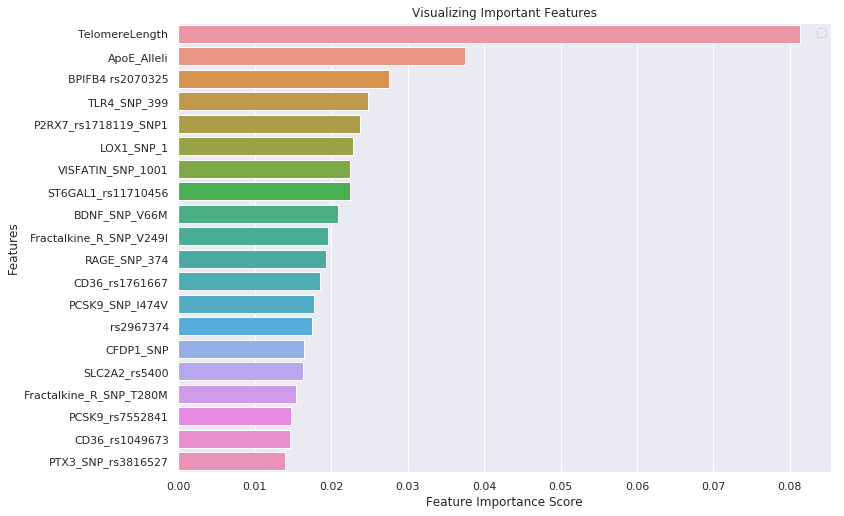

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('test5.png')
plt.show()